**Image Classification Using CNN**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load the dataset**

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
np.array([6, 9, 9, 4, 1], dtype=np.uint8)

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
y_test = y_test.reshape(-1,)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

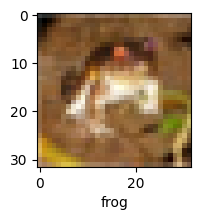

In [16]:
plot_sample(X_train, y_train, 0)

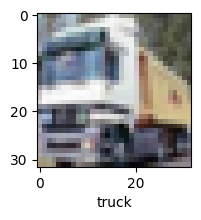

In [17]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

**Normalizing the training data**

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Build simple artificial neural network for image classification**

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.3055 - loss: 1.9328
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 75ms/step - accuracy: 0.4179 - loss: 1.6444
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 79ms/step - accuracy: 0.4483 - loss: 1.5606
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 79ms/step - accuracy: 0.4731 - loss: 1.4906
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 79ms/step - accuracy: 0.4992 - loss: 1.4292


In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.39      0.50      1000
           1       0.38      0.84      0.53      1000
           2       0.42      0.24      0.31      1000
           3       0.28      0.56      0.37      1000
           4       0.51      0.30      0.38      1000
           5       0.40      0.31      0.35      1000
           6       0.51      0.54      0.52      1000
           7       0.72      0.35      0.47      1000
           8       0.55      0.67      0.60      1000
           9       0.60      0.30      0.40      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



**CNN to train our images**

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.3689 - loss: 1.7388
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5860 - loss: 1.1860
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6433 - loss: 1.0300
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6745 - loss: 0.9385
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6984 - loss: 0.8670
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7188 - loss: 0.8066
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7400 - loss: 0.7510
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7561 - loss: 0.6922
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7769 - loss: 0.6472
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7884 - loss: 0.6121


In [24]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6914 - loss: 0.9387


[0.9475985169410706, 0.6905999779701233]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[1.51496124e-03, 3.40509869e-04, 4.66919132e-03, 8.62786651e-01,
        1.52852165e-03, 5.27057908e-02, 5.31157255e-02, 2.22481298e-03,
        7.49292132e-03, 1.36209205e-02],
       [1.48030376e-04, 2.65104976e-03, 6.05653531e-06, 5.72895733e-05,
        6.64011577e-06, 6.27022985e-07, 3.99616596e-07, 7.59378281e-07,
        9.97034848e-01, 9.42495535e-05],
       [3.91430035e-02, 3.11269201e-02, 2.15996522e-03, 1.47749921e-02,
        2.62107630e-03, 8.50183715e-04, 6.71198708e-04, 4.31373017e-03,
        8.98566663e-01, 5.77219715e-03],
       [7.11596072e-01, 8.65592435e-02, 1.11046582e-02, 1.08079575e-02,
        5.79290884e-03, 3.25027882e-04, 2.80875392e-04, 2.78660352e-03,
        1.70561656e-01, 1.84815624e-04],
       [1.11945189e-06, 8.75189377e-04, 1.32073113e-03, 2.75958981e-02,
        5.38231194e-01, 1.67534791e-03, 4.30276066e-01, 1.35419214e-06,
        1.22645906e-05, 1.08547210e-05]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

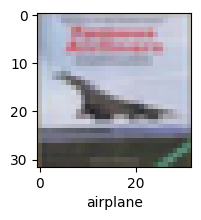

In [28]:
plot_sample(X_test, y_test,3)

In [29]:
classes[y_classes[3]]

'airplane'

In [30]:
classes[y_classes[3]]

'airplane'